### LAB3-Asíncrono-Sergio Andre Bustamante Salcedo-20213170 

# Tarea Asíncrona (2 puntos)

## Pregunta 1 (1 punto)

El muestreo de la señal:

$$ x(t) = 5 \cos(25 \pi t^2) \sin(90 \pi t) $$

a una frecuencia de 1000 Hz, genera \(x[n]\). Tomando en cuenta 256 bloques de 128 muestras cada uno, desarrolle los siguientes ítems, compare y comente lo obtenido:

#### a) Calcule y grafique los periodogramas utilizando los métodos Welch y Bartlett con traslape del 50% y ventana de tipo Hann. Analice las diferencias entre ambos métodos. ¿Cuál es más adecuado para observar los componentes de frecuencia de la señal?


In [19]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Frecuency [Hz]')

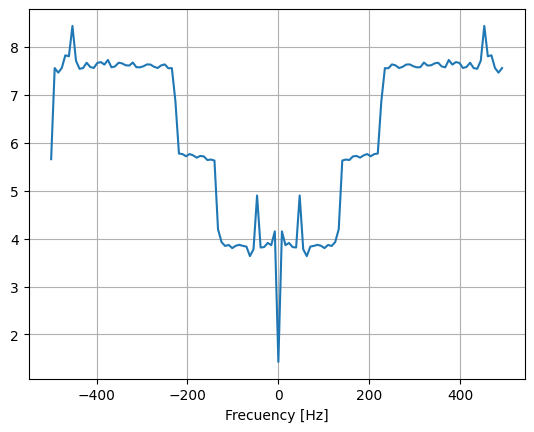

In [20]:
#Metodo Barlett
fs = 1000
L = 128 #cantidad de muestras
M = 256 #cantidad de segmentos de L muestras
N = M*L #cantidad total de muestras

n = np.arange(N)/fs
x = 5 * np.cos(25 * np.pi * n**2) * np.sin(90 * np.pi * n)

#Inicializamos matriz
Xbar = np.zeros([M,L])
for m in range (M):
    xm = x[m*L:(m+1)*L]
    Xbar[m,:] = np.abs(np.fft.fft(xm))**2 / L

Xbar = np.fft.fftshift(Xbar,axes=1)
fk = (np.arange(L) - L/2) * fs / L
per = np.mean(Xbar,axis=0)
plt.figure()
plt.plot(fk,per)
plt.grid('on')
plt.xlabel('Frecuency [Hz]')
#Se grafica del índice 0 hasta el 127 porque es una señal de 128 muestras

Text(0.5, 0, 'Frecuency [Hz]')

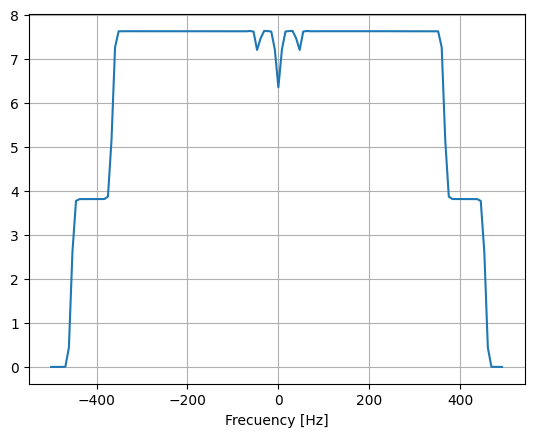

In [21]:
#Metodo Welch
Lo = int(0.5*L) #50% de L
w = np.hanning(L) #ventana tipo Hann
w = w / np.sqrt(np.mean(np.abs(w)**2))
Xperw = np.zeros([M,L])
for m in range(M):
    xmw = w*x[m*(L-Lo):m*(L-Lo) + L]
    Xperw[m,:] = np.abs(np.fft.fft(xmw))**2 / L
Xperw = np.fft.fftshift(Xperw,axes=1)
perw = np.mean(Xperw,axis=0)
plt.figure()
plt.plot(fk,perw)
plt.grid('on')
plt.xlabel('Frecuency [Hz]')

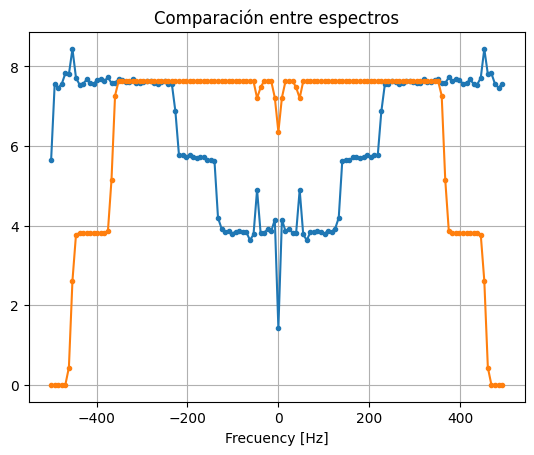

In [22]:
# Comparando espectros
fig = plt.figure()
plt.plot(fk,per,'.-')
plt.plot(fk,perw,'.-')
plt.xlabel('Frecuency [Hz]')
plt.title('Comparación entre espectros')
plt.grid('on')

In [23]:
#Analizamos ventana de tipo Hann
print(w)

[0.00000000e+00 1.00297754e-03 4.00945571e-03 9.01207715e-03
 1.59985996e-02 2.49519259e-02 3.58501457e-02 4.86665893e-02
 6.33698927e-02 7.99240744e-02 9.82886236e-02 1.18418599e-01
 1.40264740e-01 1.63773584e-01 1.88887602e-01 2.15545335e-01
 2.43681548e-01 2.73227386e-01 3.04110547e-01 3.36255452e-01
 3.69583440e-01 4.04012950e-01 4.39459728e-01 4.75837029e-01
 5.13055832e-01 5.51025057e-01 5.89651786e-01 6.28841494e-01
 6.68498276e-01 7.08525086e-01 7.48823971e-01 7.89296314e-01
 8.29843072e-01 8.70365019e-01 9.10762993e-01 9.50938132e-01
 9.90792121e-01 1.03022743e+00 1.06914756e+00 1.10745725e+00
 1.14506277e+00 1.18187209e+00 1.21779512e+00 1.25274395e+00
 1.28663307e+00 1.31937953e+00 1.35090321e+00 1.38112696e+00
 1.40997681e+00 1.43738217e+00 1.46327597e+00 1.48759484e+00
 1.51027927e+00 1.53127375e+00 1.55052690e+00 1.56799161e+00
 1.58362514e+00 1.59738922e+00 1.60925018e+00 1.61917899e+00
 1.62715136e+00 1.63314776e+00 1.63715354e+00 1.63915888e+00
 1.63915888e+00 1.637153

#### Al comparar ambas gráficas podemos apreciar que el periodograma hallado con el método Welch con una ventana tipo Hann tiene diferencias en la amplitud con el método Barlett debido a que la ventana al tener una amplitud, entonces se añade cuando se multiplica con x y posteriormente se repite el proceso, por lo que es coherente tener una diferencia entre las amplitudes, entonces podemos afirmar que al aplicar enventanado añadimos distorsión en amplitud. Asimismo, podemos afirmar que al usar la ventana la ventana tipo Hann se modifican los valores de los segmentos para suavizar discontinuidades entre ellos. Esta ventana, como lo podemos apreciar en los valores reduce el valor de las frecuencias cercanas a los bordes de cada segmento, lo que causa una distorsión en amplitud bastante notoria. Finalmente, al ser de tipo Hann tiene forma cosenoidal y hace que las frecuencias altas se atenúen más, lo que resulta en un espectro mucho más suavizado pero con menor resolución en algunas frecuencias.

### b) Calcule y grafique el espectrograma usando el método de Bartlett (frecuencia vs. tiempo) usando una ventana rectangular y una triangular. Compare ambas gráficas. ¿Qué ventajas y desventajas observa entre las dos ventanas? (1 pto)


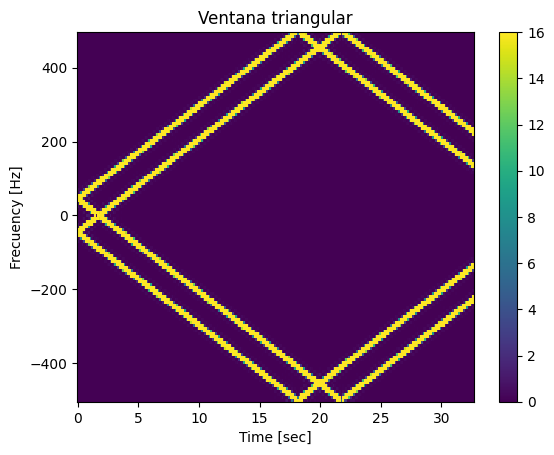

In [24]:
# ventana triangular
w_triangular = np.bartlett(L)
w_triangular = w_triangular / np.sqrt(np.mean(np.abs(w_triangular)**2))
#Inicializamos matriz
Xbar_triangular = np.zeros([M,L])
for m in range (M):
    xm_bar_triagular = x[m*L:(m+1)*L]*w_triangular
    Xbar_triangular[m,:] = np.abs(np.fft.fft(xm_bar_triagular))**2 / L

Xbar_triangular = np.fft.fftshift(Xbar_triangular,axes=1)
fk = (np.arange(L) - L/2) * fs / L
tm = np.arange(M) * L / fs
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xbar_triangular.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.title('Ventana triangular')
plt.colorbar(c)

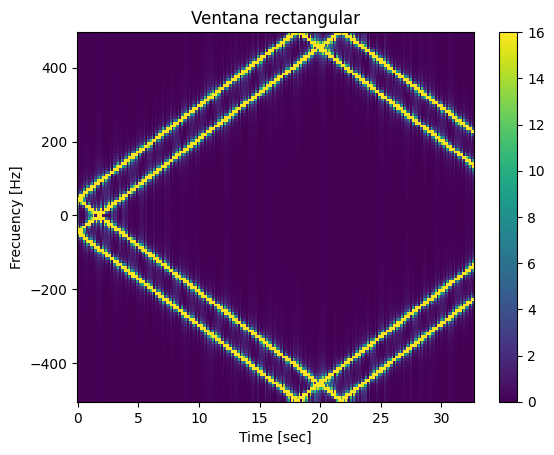

In [25]:
# ventana rectangular
w_rectangular = np.ones(L)
w_rectangular = w_rectangular / np.sqrt(np.mean(np.abs(w_rectangular)**2))
#Inicializamos matriz
Xbar_rectangular = np.zeros([M,L])
for m in range (M):
    xm_bar_rectangular = x[m*L:(m+1)*L]*w_rectangular
    Xbar_rectangular[m,:] = np.abs(np.fft.fft(xm_bar_rectangular))**2 / L

Xbar_rectangular = np.fft.fftshift(Xbar_rectangular,axes=1)
fk = (np.arange(L) - L/2) * fs / L
tm = np.arange(M) * L / fs
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xbar_rectangular.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.title('Ventana rectangular')
plt.colorbar(c)

#### Analizando la ventana rectangular: Es una ventana que no suaviza ya que cada muestra del segmento tiene el mismo peso (1), por lo que no se suavizan las discontinuidades en los bordes de cada segmento por lo tanto hay mayor fuga espectral y también hay mayor ruido en las altas frecuencias. Por otro lado, la ventaja es que la amplitud ya no se distorsiona ya que como el peso de todos es 1, entonces no habría distorsión alguna, finalmente, cabe destacar que implementar una ventana rectangular es más simple que una ventana triangular.

#### Analizando la ventana triangular: Ventana que suaviza bordes del segmento de la señal asignando más peso (más valor) a las muestras cercanas al centro, esto ayuda a recibir las discontinuidades en los bordes. La ventaja es que disminuye las fugas espectrales (esto se puede apreciar en el gráfico y la diferencia entre un espectrograma más claro o limpio (triangular) y el otro espectrograma con menor claridad (rectangular)) y tiene una mayor precisión en representación en frecuencias (cada componenten frecuencial está mejor delimitada). La desventaja es que hay distorsión de amplitud debido a que los bordes de los segmentos se ven realmente afectados por el comportamiento triangular (mayor atenuación en extremos) de la ventana y también se puede perder resolución temporal debido a la suavización.

### c) Calcule y grafique el espectrograma utilizando el método Welch con traslape del 75% y una ventana de Hamming. Discuta los cambios observados respecto a un traslape del 50%. ¿Afecta esto la resolución temporal o frecuencial? (1 pto)


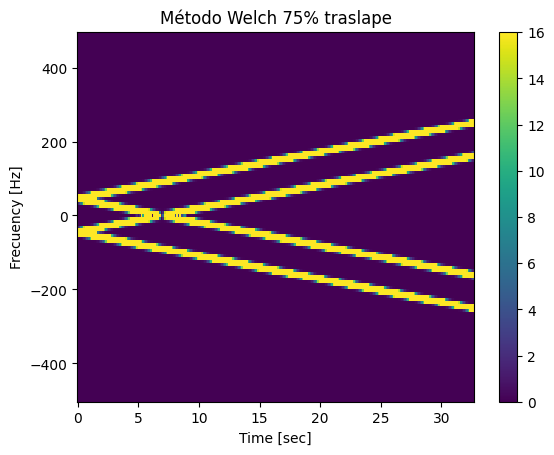

In [26]:
#Método Welch 75% traslape
Lo_75 = int(0.75*L)
ventana_hamming = np.hamming(L)
ventana_hamming = ventana_hamming / np.sqrt(np.mean(np.abs(ventana_hamming)**2))
Xper_welch_75 = np.zeros([M,L])
for m in range(M):
    xmw_75 = ventana_hamming*x[m*(L-Lo_75):m*(L-Lo_75) + L]
    Xper_welch_75[m,:] = np.abs(np.fft.fft(xmw_75))**2 / L
Xper_welch_75 = np.fft.fftshift(Xper_welch_75,axes=1)
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xper_welch_75.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.title('Método Welch 75% traslape')
plt.colorbar(c)

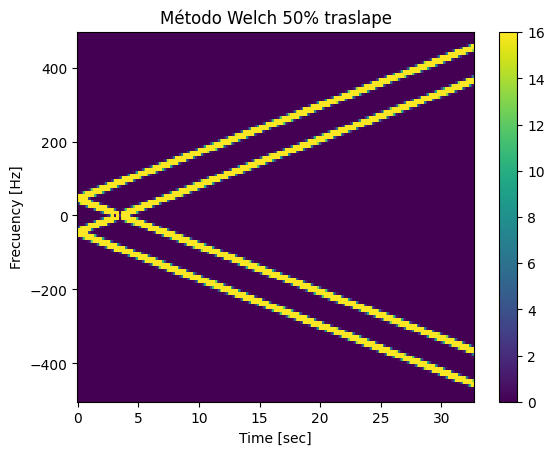

In [27]:
#Metodo Welch 50% traslape
Lo_50 = int(0.5*L)
Xper_welch_50 = np.zeros([M,L])
for m in range(M):
    xmw_50 = ventana_hamming*x[m*(L-Lo):m*(L-Lo) + L]
    Xper_welch_50[m,:] = np.abs(np.fft.fft(xmw_50))**2 / L
Xper_welch_50 = np.fft.fftshift(Xper_welch_50,axes=1)
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xper_welch_50.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.title('Método Welch 50% traslape')
plt.colorbar(c)

### Comparación entre traslapes: 50% y 75%

### En el traslape de 75% de la longitud de L, hay una mayor superposición de segmentos esto trae como ventaja el tener una mayor resolución frecuencial, como hay más datos solapados en cada ventana, entonces mejora la representación en frecuencia al incluir más información sobre la señal en cada ventana. Asimismo, hay menor variabilidad en frecuencia ya que se reduce las variaciones entre segmentos. Como desventaja es que se el sistema se vuelve más complejo ya que como están traslapados al 75% entonces se generarán más cálculos para generar el espetrograma. Por otro lado, la resolución temporal se ve reducida porque al superponer más segmentos, la resolución temporal disminuye lo que implica pérdida de precisión en el tiempo.

### En el traslape de 50% de la longitud de L, hay una menor superposición de segmentos, por lo que sí afecta respecto al caso de 75% de traslape tanto en resolución de frecuencia como en tiempo. La ventaja principal es que hay mayor resolución temporal ya que hay un menor traslapamiento entre los segmentos ya que se evalúa más rápido el contenido de la señal, por otro lado hay menor costo computacional ya que hay menos operaciones que en el caso anterior. Por otro lado, la mayor desventaja es que la resolución frecuencial empeora respecto al caso de 75% ya que se pierde la calidad por un menor traslape y hay mayor ruido espectral ya que hay mayor variabilidad entre los segmentos lo que puede generar una mayor fuga espectral.

#### d) Repita la parte c considerando 600 Hz de frecuencia de muestreo para generar \( x[n] \). Compare con los resultados obtenidos con la frecuencia de 1000 Hz y analice cómo influye la frecuencia de muestreo en la fuga espectral y la resolución. (1 pto)


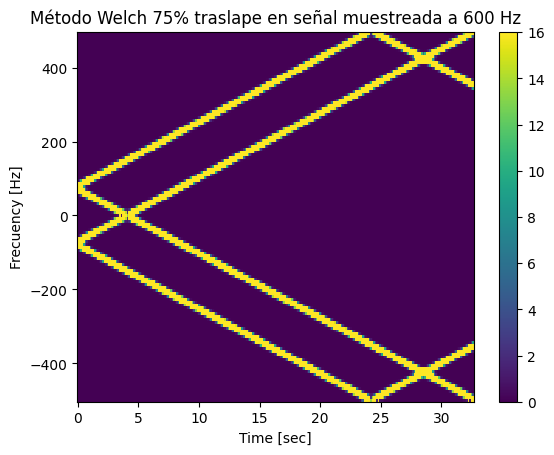

In [28]:
#Sea ahora
fs_new = 600
n_new = np.arange(N)/fs_new
x_600 = 5 * np.cos(25 * np.pi * n_new**2) * np.sin(90 * np.pi * n_new)

#Aplicamos Welch 75% traslape
Xper_welch_75_600 = np.zeros([M,L])
for m in range(M):
    xmw_75_600 = ventana_hamming*x_600[m*(L-Lo_75):m*(L-Lo_75) + L]
    Xper_welch_75_600[m,:] = np.abs(np.fft.fft(xmw_75_600))**2 / L
Xper_welch_75_600 = np.fft.fftshift(Xper_welch_75_600,axes=1)
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xper_welch_75_600.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.title('Método Welch 75% traslape en señal muestreada a 600 Hz')
plt.colorbar(c)

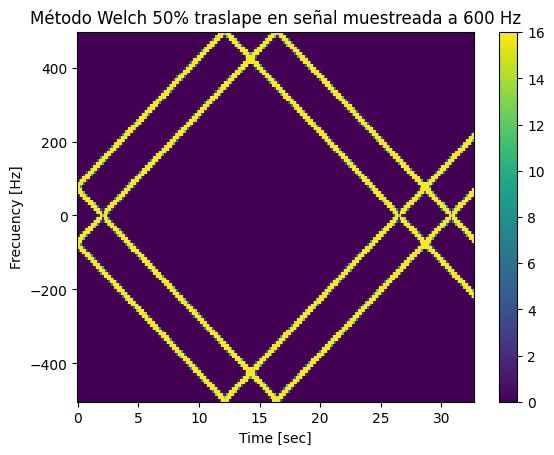

In [29]:
#Aplicamos Welch 50% traslape
Xper_welch_50_600 = np.zeros([M,L])
for m in range(M):
    xmw_50_600 = ventana_hamming*x_600[m*(L-Lo_50):m*(L-Lo_50) + L]
    Xper_welch_50_600[m,:] = np.abs(np.fft.fft(xmw_50_600))**2 / L
Xper_welch_50_600 = np.fft.fftshift(Xper_welch_50_600,axes=1)
fig = plt.figure()
c = plt.pcolormesh(tm,fk,Xper_welch_50_600.T,shading='auto')
plt.xlabel('Time [sec]')
plt.ylabel('Frecuency [Hz]')
plt.clim([0,16])
plt.title('Método Welch 50% traslape en señal muestreada a 600 Hz')
plt.colorbar(c)

### Cuando se muestrea en frecuencias más altas, se tiene más muestras por segundo, lo que permite capturar mejor la señal. Debido al tener más muestras por segmento, se obtiene una mejor representación en frecuencia (aumenta la precisión) y, por lo tanto, hay menor fuga espectral ya que las transiciones están más delimitadas.

### En cambio en frecuencia de 600 Hz, la cantidad de muestras disminuye lo que incapacita a la hora de representar la señal en espectrograma con la misma calidad que en 1000 Hz. Ahora, también podemos afirmar que hay mayor fuga espectral ya que como hay menos muestras por segmento, las discontinuidades en los bordes son más pronunciadas. Además, en cuanto a la resolución temporal como hay menos muestras significa que los cambios rápidos en la señal no se pueden ver rápidos.

### A manera de conclusión se tiene que a una frecuencia de muestreo mayor habrá una mayor resolucuón temporal y frecuencial según los gráficos y los resultados ya obtenidos.

### Pregunta 2 (4 puntos)

Se tiene el siguiente sistema de diferencias:

$$
y[n] - 1.3829y[n - 1] + 0.4128y[n - 2] = 0.0675x[n] + 0.1349x[n - 1] + 0.0675x[n - 2]
$$

y una señal obtenida de un EMG (Electromiograma), con 4 activaciones musculares, que se encuentra en el archivo **(EMG.npy)**.

b) Utilizando ecuaciones recursivas, calcule y grafique la respuesta al impulso unitario con $x[n] = \delta[n]$ para $-2 \leq n \leq 100$ y $y[-1] = 0$ y $y[-2] = 0$. (1 pto)

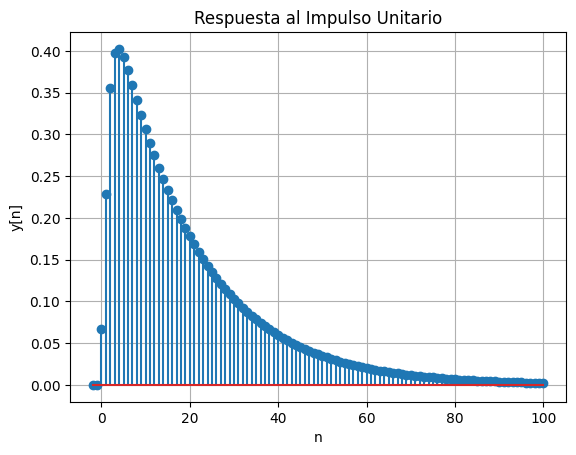

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# coeficientes
a1 = 1.3829
a2 = 0.4128
b0 = 0.0675
b1 = 0.1349
b2 = 0.0675

# Condiciones iniciales
n_min = -2
n_max = 100
n_range = np.arange(n_min, n_max + 1)

y_impulso = np.zeros(len(n_range))
x = np.zeros(len(n_range))

# Definir impulso unitario (delta)
x[n_range == 0] = 1  # x[n] = δ[n]

# Condiciones iniciales
y_impulso[n_range == -1] = 0
y_impulso[n_range == -2] = 0 

# Calcular la respuesta recursiva de estado cero
for n in range(2, len(n_range)):
    y_impulso[n] = a1 * y_impulso[n-1] - a2 * y_impulso[n-2] + b0 * x[n] + b1 * x[n-1] + b2 * x[n-2]

plt.stem(n_range, y_impulso)
plt.title('Respuesta al Impulso Unitario')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid(True)
plt.show()


c) Cargue la señal EMG usando el comando `np.load()` y, utilizando ecuaciones recursivas, calcule y grafique la respuesta a una entrada $x[n] = EMG_{signal}[n]$ con condiciones iniciales $y[-1] = 0$ y $y[-2] = 0$. 

Analice el resultado obtenido y compárelo con la señal original, ¿qué efecto produjo la aplicación de la ecuación sobre la señal? (1 pto)


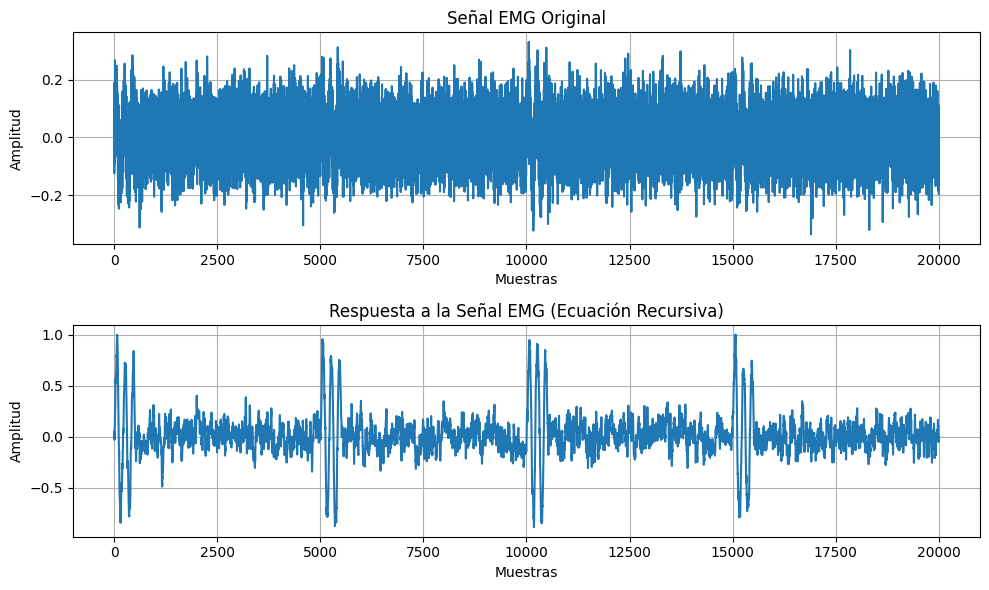

In [31]:
# Cargar la señal EMG desde el archivo
EMG_signal = np.load('EMG.npy')

# Inicializar la señal de salida y entrada
n = len(EMG_signal)
y_emg = np.zeros(n)
x = EMG_signal  # La entrada es la señal EMG

# Condiciones iniciales
y_emg[0] = 0  # y[-1] = 0
y_emg[1] = 0  # y[-2] = 0

# Calcular la respuesta recursiva para la señal EMG
for i in range(2, n):
    y_emg[i] = a1 * y_emg[i-1] - a2 * y_emg[i-2] + b0 * x[i] + b1 * x[i-1] + b2 * x[i-2]

# Grafico de EMG
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(EMG_signal)
plt.title('Señal EMG Original')
plt.xlabel('Muestras')
plt.grid(True)
plt.ylabel('Amplitud')

# Graficar la señal procesada (respuesta recursiva)
plt.subplot(2, 1, 2)
plt.plot(y_emg)
plt.title('Respuesta a la Señal EMG (Ecuación Recursiva)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

### La señal EMG original tiene una amplitud relativamente baja y tiene un comportamiento aleatorio o de ruido, aproximadamente varía la amplitud dentro de un rango de [-0.2; 0.2]. Luego de aplicar la ecuación recursiva, se observan grandes picos en la amplitud de la señal los cuales llegan a aproximadamente a amplitudes de 1 o -1, por lo que se ve una amplificación de la señal.

### Estos picos se pueden deber a ciertos eventos en que la señal original fue amplificada. Asimismo, el comportamiento después de los picos muestra que la respuesta de la señal EMG tiene una estructura más definida en comparación a la señal original ya que el sistema actúa como un filtro que resalta ciertas frecuencias o eventos en la señal.

d) Utilizando la respuesta al impulso obtenida previamente, calcule y grafique la convolución de la entrada $x[n] = EMG_{signal}[n]$ con la respuesta al impulso del sistema. Compare este resultado con la respuesta obtenida por las ecuaciones recursivas en el punto anterior. (1 pto)


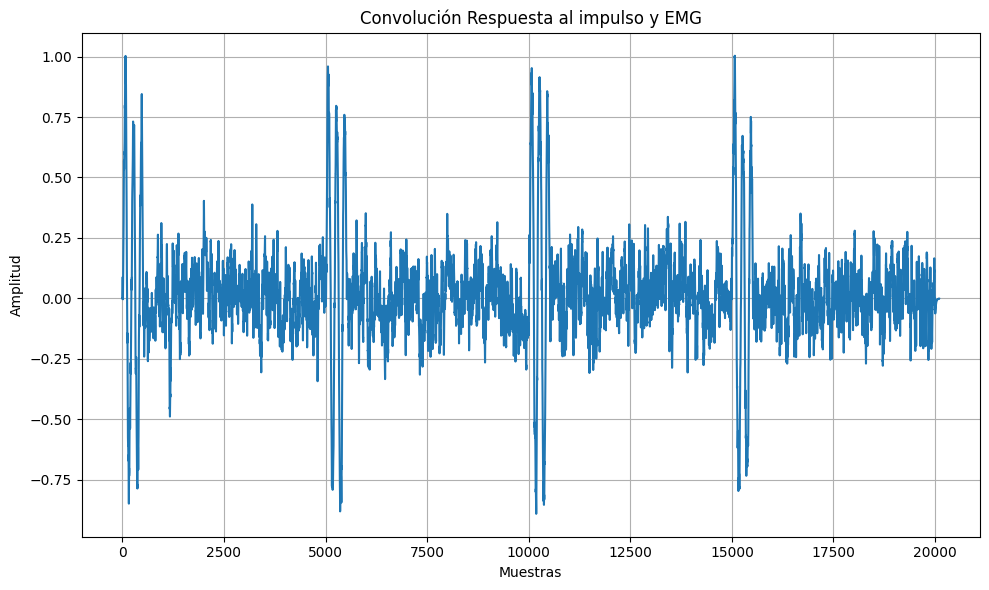

0.08851188363081623
0.01065594507863236
Los arrays no son aproximadamente iguales


In [53]:
conv_emg_impulso = np.convolve(x,y_impulso)
plt.figure(figsize=(10, 6))
plt.plot(conv_emg_impulso)
plt.title('Convolución Respuesta al impulso y EMG')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

#Comparamos ambos arreglos:
min_len = min(len(conv_emg_impulso), len(y_emg))
conv_emg_impulso_short = conv_emg_impulso[:min_len]
y_emg_short = y_emg[:min_len]

print(conv_emg_impulso_short[8])
print(y_emg_short[3])
if np.allclose(conv_emg_impulso_short, y_emg_short):
    print("Los arrays son aproximadamente iguales")
else:
    print("Los arrays no son aproximadamente iguales")

### Al tener la convolución entre la respuesta al impulso y la señal de entrada EMG, podemos observar que existe una gran semejanza de la gráfica de la convolución entre respuesta al impulso y la señal EMG y el cálculo de la respuesta con entrada de señal EMG de forma recursiva, es decir, el comportamiento es muy similar. Sin embargo, el cálculo de la respuesta al ser de dos formas diferentes, hay cierta diferencia en los valores calculados de ambas respuestas al sistema, tanto de forma recursiva como la de convolución computacionalmente, por lo que, en este aspecto al usar la función np.allclose(), podemos concluir que los valores no son diferentes (por muy poco), por ello, es que no son aproximadamente iguales en el valor al no ser menor la diferencia que el umbral de la función. De esta manera, podemos también concluir que computacionalmente hablando, no es lo mismo calcular por convolución o de forma recursiva la respuesta al sistema, esto también porque al hacerlo de forma recursiva se acumulan errores en los cálculos debido a la repetición de operaciones, mientras que la convolución hace el cálculo directo por lo que no cuenta con estos errores.

e) Grafique los polos y ceros de la función de transferencia en el plano z. Indique si el sistema es BIBO estable. (1 pto)


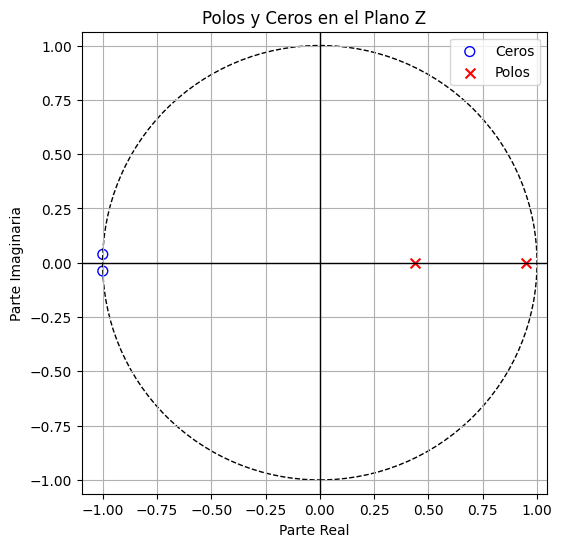

El sistema es BIBO estable.


In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Coeficientes del numerador y denominador de la función de transferencia
numerator = [0.0675, 0.1349, 0.0675]
denominator = [1, -1.3829, 0.4128]

# Calcular polos y ceros
z, p, k = signal.tf2zpk(numerator, denominator) #ZEROS, POLOS

# Graficar polos y ceros
plt.figure(figsize=(6, 6))
plt.scatter(np.real(z), np.imag(z), s=50, marker='o', label='Ceros', edgecolors='b', facecolors='none')
plt.scatter(np.real(p), np.imag(p), s=50, marker='x', label='Polos', color='r')

# Dibujar el círculo unitario
circle = plt.Circle((0, 0), radius=1, fill=False, color='black', ls='dashed')
plt.gca().add_artist(circle)

plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.title('Polos y Ceros en el Plano Z')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()

# Verificar estabilidad BIBO
is_stable = np.all(np.abs(p) < 1)
if is_stable:
    print("El sistema es BIBO estable.")
else:
    print("El sistema NO es BIBO estable.")


### En primer lugar, analizando la respuesta al impulso unitario en el sistema, podemos inferir que estamos ante un sistema Causal, por lo que para comprobar si es BIBO estable entonces el análisis se reduce a que si dentro del círculo unitario se encuentran los polos, es decir, el valor de los polos en módulo no deben ser mayores ni iguales a 1, entonces el sistema es BIBO estable, ante ello, al calcular los polos y también graficarlos en el Plano Z, podemos observar que se cumple con lo antes pospuesto, por lo que como conclusión, el sistema es BIBO estable.

### Pregunta 3 (3 puntos)

Dadas las siguientes respuestas al impulso de sistemas causales:

$$
h[n] = \delta[n] + (0.3^n + 0.7^n)u[n]
$$

$$
g[n] = (1 + (-1)^n)1.2^n u[n] + n 0.9^n u[n]
$$

**a)** Determine las funciones de transferencia $H(z)$ y $G(z)$ asociadas a las respuestas al impulso $h[n]$ y $g[n]$, respectivamente. Halle la ROC de ambas funciones de transferencia. (1 pto)


In [135]:
import sympy as sp
from scipy.signal import lfilter

In [136]:
# Definir las variables simbólicas
z = sp.symbols('z')
n = sp.symbols('n', integer=True)
#Calculamos la transformada de fourier de H(z)
H_z = sp.Sum((sp.Rational(3,10)**n)*(z)**(-n) + (sp.Rational(7,10)**n)*(z)**(-n), (n,0,sp.oo)) + 1
Hz_doit = H_z.doit()
# Extraemos las transformadas
H_z_original = (Hz_doit.args[1]).args[0][0]  + (Hz_doit.args[2]).args[0][0]  + (Hz_doit.args[0])
# Extraemos las ROC
ROC_H_z_1 = (Hz_doit.args[1]).args[0][1]
ROC_H_z_2 = (Hz_doit.args[2]).args[0][1]
#Hacemos la interseccion de ambas para calcular la ROC_H_z
ROC_H_z = sp.And(ROC_H_z_1,ROC_H_z_2)
ROC_H_z = sp.simplify(ROC_H_z)

La función de transferencia H(z):


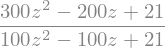

In [137]:
print(f"La función de transferencia H(z):")
sp.simplify(H_z_original)

La ROC asociada a H(z):


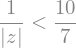

In [138]:
print(f"La ROC asociada a H(z):")
sp.simplify(ROC_H_z)

In [139]:
#Calculamos la transformada de fourier de G(z)
G_z = sp.Sum((1+(-1)**n)*(sp.Rational(12,10)**n)*(z)**(-n) + n*(sp.Rational(9,10)**n)*(z)**(-n), (n,0,sp.oo))
Gz_doit = G_z.doit()
# Extraemos las transformadas
G_z_original = (Gz_doit.args[0]).args[0][0] + (Gz_doit.args[1]).args[0][0] + (Gz_doit.args[2]).args[0][0]
# Extraemos las ROC
ROC_G_z_1 = (Gz_doit.args[0]).args[0][1]
ROC_G_z_2 = (Gz_doit.args[1]).args[0][1]
ROC_G_z_3 = (Gz_doit.args[2]).args[0][1]
#Hacemos la interseccion para calcular la ROC_G_z
ROC_G_z = sp.And(ROC_G_z_1,ROC_G_z_2, ROC_G_z_3)
ROC_G_z = sp.simplify(ROC_G_z)

La función de transferencia G(z):


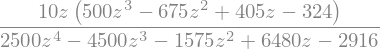

In [140]:
print(f"La función de transferencia G(z):")
sp.simplify(G_z_original)

La ROC asociada a G(z):


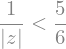

In [141]:
print(f"La ROC asociada a G(z):")
sp.simplify(ROC_G_z)

**b)** Utilizando la función `roots` de Matlab o la función `roots` de la librería `numpy` en Python, obtenga los polos y ceros de $H(z)$ y $G(z)$ y gráfiquelos en el plano $z$. A partir de los polos, ceros y ROCs, determine si los sistemas son estables. (1 pto)


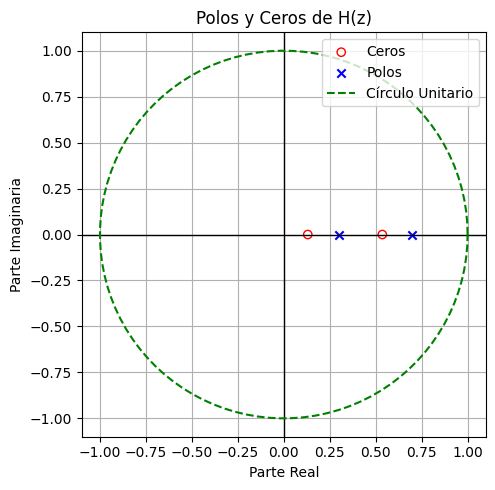

In [142]:
numerador_H = [300, -200, 21]
denominador_H = [100, -100, 21]
numerador_G = [5000, -6750, 4050, -3240,0]
denominador_G = [2500, -4500, -1575, 6480,-2916]
zeros_H = np.roots(numerador_H)
polos_H = np.roots(denominador_H)
zeros_G = np.roots(numerador_G)
polos_G = np.roots(denominador_G)

# Graficar polos y ceros para H(z)
plt.figure(figsize=(10, 5))
plt.scatter(np.real(zeros_H), np.imag(zeros_H), marker='o', facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(np.real(polos_H), np.imag(polos_H), marker='x', color='b', label='Polos')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
# Graficar el círculo unitario
angulos = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(angulos), np.sin(angulos), color='g', linestyle='--', label='Círculo Unitario')
plt.title('Polos y Ceros de H(z)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend(loc='upper right')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [143]:
#El sistema h[n]y g[n] son causales por lo que el análisis se reduce a observar si los polos de ambas funciones de transferencia están situados dentro
#del círculo unitario, por lo que evaluamos eso en primer lugar H(z):
# Verificar la estabilidad del sistema
def es_estable(polos):
    # El sistema es estable si todos los polos están dentro del círculo unitario
    return np.all(np.abs(polos) < 1)

es_estable_H = es_estable(polos_H)
print(f"¿Es H(z) estable? {'Sí, el sistema h[n] es BIBO estable' if es_estable_H else 'No'}")

¿Es H(z) estable? Sí, el sistema h[n] es BIBO estable


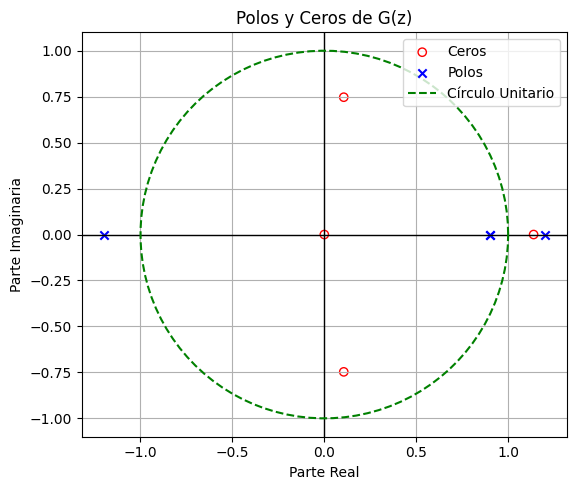

¿Es G(z) estable? No, el sistema g[n] no es estable


In [144]:
# Graficar polos y ceros para G(z)
plt.figure(figsize=(10, 5))
plt.scatter(np.real(zeros_G), np.imag(zeros_G), marker='o', facecolors='none', edgecolors='r', label='Ceros')
plt.scatter(np.real(polos_G), np.imag(polos_G), marker='x', color='b', label='Polos')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
# Graficar el círculo unitario
angulos = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(angulos), np.sin(angulos), color='g', linestyle='--', label='Círculo Unitario')
plt.title('Polos y Ceros de G(z)')
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginaria')
plt.grid(True)
plt.legend(loc='upper right')
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

es_estable_G = es_estable(polos_G)
print(f"¿Es G(z) estable? {'Sí, el sistema g[n] es BIBO estable' if es_estable_G else 'No, el sistema g[n] no es estable'}")

c) Grafique las respuestas al escalón unitario de ambos sistemas para las primeras 200 muestras $0 \leq n \leq 199$ usando los coeficientes de la función de transferencia (Sugerencia: Investigue el comando `lfilter` de `scipy.signal`). Comente la relación con el análisis realizado en los puntos anteriores. (1 pto)


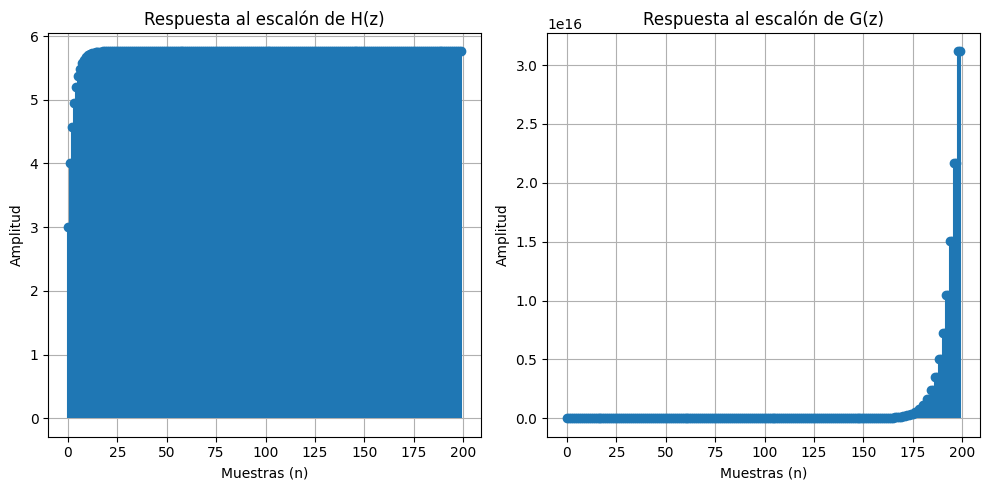

In [145]:
n = np.arange(200)
escalon_unitario = np.ones(200)

respuesta_H = signal.lfilter(numerador_H, denominador_H, escalon_unitario)
respuesta_G = signal.lfilter(numerador_G, denominador_G, escalon_unitario)

# Graficar las respuestas al escalón para H(z) y G(z)
plt.figure(figsize=(10, 5))

# Gráfico para H(z)
plt.subplot(1, 2, 1)
plt.stem(n, respuesta_H, basefmt=" ")
plt.title('Respuesta al escalón de H(z)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

# Gráfico para G(z)
plt.subplot(1, 2, 2)
plt.stem(n, respuesta_G, basefmt=" ")
plt.title('Respuesta al escalón de G(z)')
plt.xlabel('Muestras (n)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

### En cuanto al sistema h[n] podemos observar el comportamiento cuando la señal de entrada es un escalón unitario el cual luego de una etapa de transición, se estabiliza (el valor tiende a 6 aproximadamente), pero en sí lo importante es que este valor al que tiende es constante por lo que es muy común en sistemas que son estables.

### Por otro lado, en cuanto al sistema g[n], el comportamiento es de carácter exponencial creciente en las amplitudes de la señal de salida, lo cual confirma su inestabilidad, esto es debido a que los polos fuera del círculo unitario generan un comportamiento creciente y no acotado en el tiempo.